In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from dython import nominal
import matplotlib.pyplot as plt

In [2]:
df_train=pd.read_csv("train.csv")
df_test=pd.read_csv("test.csv")

In [3]:
#df_test.set_index('uniqueid')
df_test.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent


In [4]:
#check size of data
df_train.shape

(23524, 13)

##### 23524 observations
##### 13 columns

In [5]:
#check unique values for each column
df_train.nunique()

country                      4
year                         3
uniqueid                  8735
bank_account                 2
location_type                2
cellphone_access             2
household_size              20
age_of_respondent           85
gender_of_respondent         2
relationship_with_head       6
marital_status               5
education_level              6
job_type                    10
dtype: int64

In [6]:
for column in df_train.columns:
    print(column, df_train[column].unique())
    

country ['Kenya' 'Rwanda' 'Tanzania' 'Uganda']
year [2018 2016 2017]
uniqueid ['uniqueid_1' 'uniqueid_2' 'uniqueid_3' ... 'uniqueid_8757'
 'uniqueid_8758' 'uniqueid_8759']
bank_account ['Yes' 'No']
location_type ['Rural' 'Urban']
cellphone_access ['Yes' 'No']
household_size [ 3  5  8  7  1  6  4 10  2 11  9 12 16 15 13 14 21 18 17 20]
age_of_respondent [ 24  70  26  34  32  42  54  76  40  69  64  31  38  47  27  48  25  21
  18  22  58  55  62  29  35  45  67  19  80  66  50  33  28  51  16  17
  30  37  59  65  46  56  52  23  43  49  44  72  53  63  39  81  78  36
  20  60  95  71  57  85  68  41  61  75  86  73  93  74  88  90  77  84
  82  89  79  83  94  87  92  91  98  97  96  99 100]
gender_of_respondent ['Female' 'Male']
relationship_with_head ['Spouse' 'Head of Household' 'Other relative' 'Child' 'Parent'
 'Other non-relatives']
marital_status ['Married/Living together' 'Widowed' 'Single/Never Married'
 'Divorced/Seperated' 'Dont know']
education_level ['Secondary education' 

##### The data consisting in:
##### Four countries: Kenya, Rwanda, Tanzania, and Uganda;
##### Three years: 2016, 2017, and 2018;
##### 8759 interviewees;
##### 2 regions: Rural and Urban;
##### Household_size (number of people living in the house) in [1,21];
##### Cellphone_access: yes (have access to a cellphone) and no (do not have access to a cellphone);
##### Age: in [16, 100];
##### Gender: Female and Male;
##### Relationship_with_head: spouse, head of household, other relative, child, parent, other no-relatives, dont know;
##### Marital status: married, widowed, single, divorced/seperated, dont know;
##### Education level: secondary education, no formal education, Vocational/Specialised training, Primary education, ertiary education, and Other/Dont know/RTA;
##### Job type: Self employed, Government Dependent, Formally employed Private, Informally employed,Formally employed Government, Farming and Fishing, Remittance Dependent, Other Income, Dont Know/Refuse to answer, and No Income;
##### Bank account: Yes(Have a bank account), no (do not have a bank account)

In [7]:
def createcolum(df_train):
    df_train["unique_id"]=df_train["uniqueid"] + " " + "x"+" "+df_train["country"]
    # shift column 'unique_id' to first position
    first_column = df_train.pop('unique_id')  
    # insert column using insert(position,column_name,first_column)
    df_train.insert(0, 'unique_id', first_column)
    df_train.drop('uniqueid',axis=1,inplace=True)
    df_train.drop('year',axis=1,inplace=True)
    return df_train
df_train=createcolum(df_train)

In [8]:
df_train.head()

,unique_id,country,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,uniqueid_1 x Kenya,Kenya,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,uniqueid_2 x Kenya,Kenya,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,uniqueid_3 x Kenya,Kenya,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,uniqueid_4 x Kenya,Kenya,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,uniqueid_5 x Kenya,Kenya,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [9]:
#check unique values for each column
df_train.nunique()

unique_id                 23524
country                       4
bank_account                  2
location_type                 2
cellphone_access              2
household_size               20
age_of_respondent            85
gender_of_respondent          2
relationship_with_head        6
marital_status                5
education_level               6
job_type                     10
dtype: int64

In [10]:
#checking the percentage of missing values per columns
df_missing=(df_train.isnull().sum())*100/len(df_train)
df_missing

unique_id                 0.0
country                   0.0
bank_account              0.0
location_type             0.0
cellphone_access          0.0
household_size            0.0
age_of_respondent         0.0
gender_of_respondent      0.0
relationship_with_head    0.0
marital_status            0.0
education_level           0.0
job_type                  0.0
dtype: float64

C:\Users\aurel\anaconda3\lib\site-packages\dython\nominal.py:137: RuntimeWarning: Unable to calculate Cramer's V using bias correction. Consider using bias_correction=False (or cramers_v_bias_correction=False if calling from associations)
  warnings.warn(


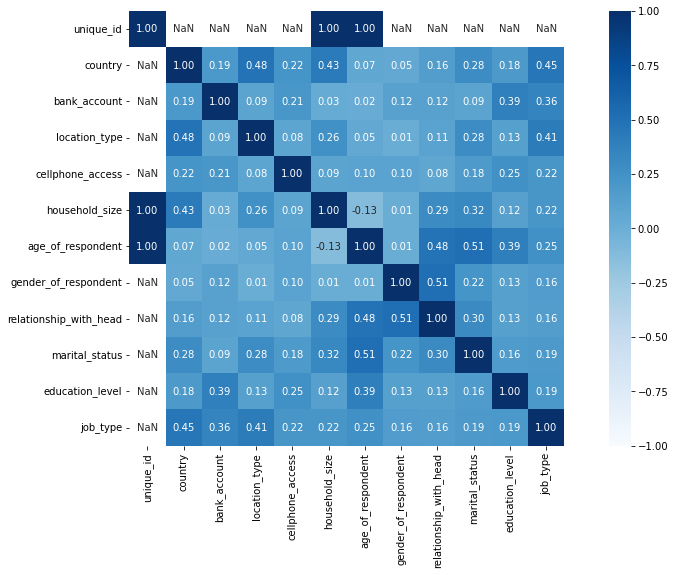

In [11]:
# using dython library
from dython.nominal import associations
# Step 1: Instantiate a figure and axis object
fig, ax = plt.subplots(figsize=(16, 8))
# Step 2: Creating a pair-wise correlation plot 
# Saving it into a variable(r)
r = associations(df_train, ax = ax, cmap = "Blues")

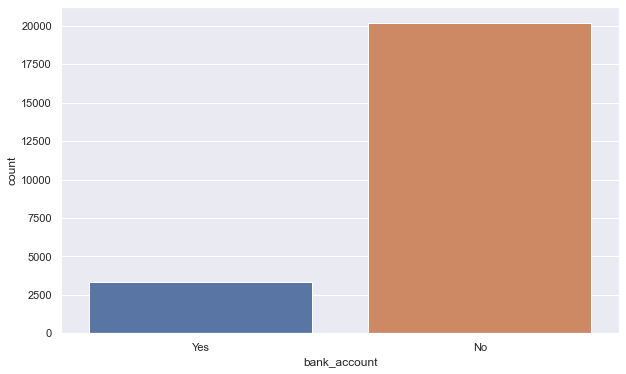

In [12]:
#count plot first violation type testset
plt.figure(figsize=(10,6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="bank_account", data=df_train)

In [13]:
from imblearn.over_sampling import SMOTE

<AxesSubplot:xlabel='country', ylabel='Count'>

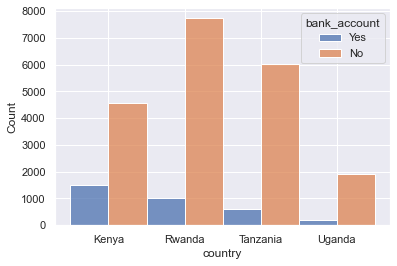

In [14]:
sns.histplot(binwidth=0.5, x="country", hue="bank_account", data=df_train, stat="count", multiple="dodge")


<AxesSubplot:xlabel='location_type', ylabel='Count'>

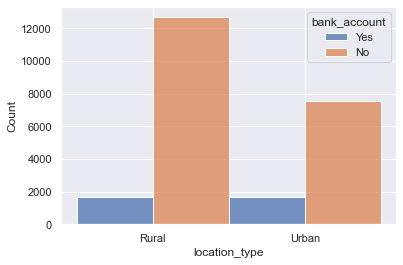

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(binwidth=0.5, x="location_type", hue="bank_account", data=df_train, stat="count", multiple="dodge")


<AxesSubplot:xlabel='cellphone_access', ylabel='Count'>

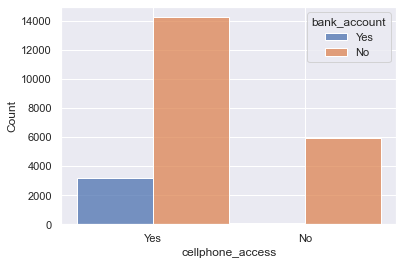

In [16]:
sns.histplot(binwidth=0.5, x="cellphone_access", hue="bank_account", data=df_train, stat="count", multiple="dodge")

In [17]:
df_train[df_train["cellphone_access"]=="No"].shape[0] *100/df_train.shape[0]

25.8034347900017

<Figure size 72x7200 with 0 Axes>

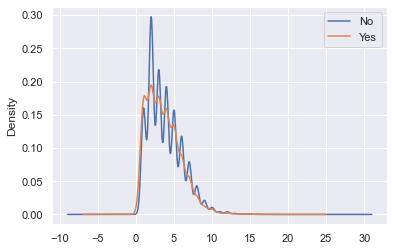

<Figure size 72x7200 with 0 Axes>

In [18]:
import matplotlib.pyplot as plt
#df_train.reset_index('age_of_respondent', inplace=True)
df_train.groupby('bank_account').household_size.plot(kind='kde',legend=True)
plt.figure(figsize=(1,100))

In [19]:
#df_train=df_train[(df_train['household_size']>0)&(df_train['household_size']<11)]

<Figure size 72x7200 with 0 Axes>

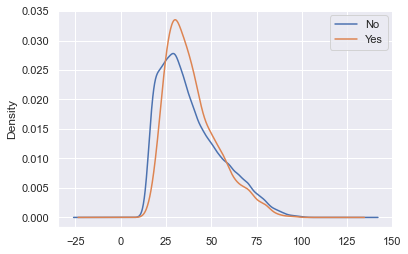

<Figure size 72x7200 with 0 Axes>

In [20]:
df_train.groupby('bank_account').age_of_respondent.plot(kind='kde',legend=True)
plt.figure(figsize=(1,100))

##### 6068 kenya
##### 8735 Rwanda
##### 6620 Tanzania
##### 2101 Uganda

In [21]:
df_train[df_train["location_type"]=="Rural"].shape[0] *100/df_train.shape[0]

60.97177350790682

###### 60.97 % interviewees are from Rural location

In [22]:
df_Rwanda=df_train[df_train["country"]=="Rwanda"]
df_Rwanda[df_Rwanda["location_type"]=="Rural"].shape[0] *100/df_Rwanda.shape[0]

85.66685746994848

<AxesSubplot:xlabel='location_type', ylabel='Count'>

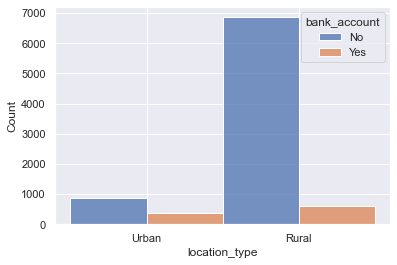

In [23]:
sns.histplot(binwidth=0.5, x="location_type", hue="bank_account", data=df_Rwanda, stat="count", multiple="dodge")


In [24]:
df_Tanzania=df_train[df_train["country"]=="Tanzania"]
df_Tanzania[df_Tanzania["location_type"]=="Rural"].shape[0] *100/df_Tanzania.shape[0]

27.326283987915406

<AxesSubplot:xlabel='location_type', ylabel='Count'>

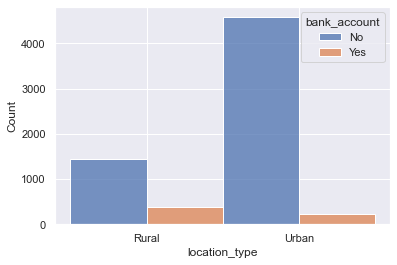

In [25]:
sns.histplot(binwidth=0.5, x="location_type", hue="bank_account", data=df_Tanzania, stat="count", multiple="dodge")


In [26]:
df_Tanzania["age_of_respondent"].mean(), df_Tanzania["age_of_respondent"].min()

(38.479607250755286, 16)

In [27]:
df_Kenya=df_train[df_train["country"]=="Kenya"]
df_Kenya[df_Kenya["location_type"]=="Rural"].shape[0] *100/df_Kenya.shape[0]

58.388266315095585

<AxesSubplot:xlabel='location_type', ylabel='Count'>

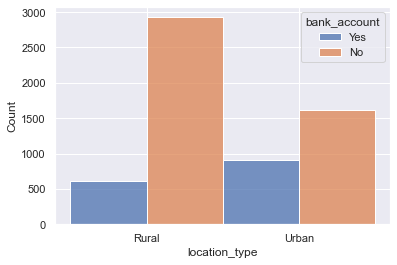

In [28]:
sns.histplot(binwidth=0.5, x="location_type", hue="bank_account", data=df_Kenya, stat="count", multiple="dodge")


In [29]:
df_Uganda=df_train[df_train["country"]=="Uganda"]
df_Uganda[df_Uganda["location_type"]=="Rural"].shape[0] *100/df_Uganda.shape[0]


71.77534507377439

<AxesSubplot:xlabel='location_type', ylabel='Count'>

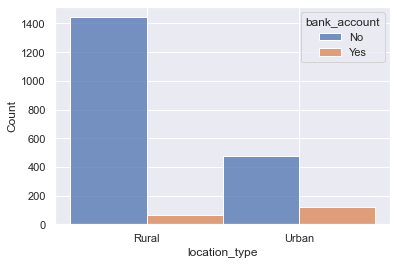

In [30]:
sns.histplot(binwidth=0.5, x="location_type", hue="bank_account", data=df_Uganda, stat="count", multiple="dodge")


In [31]:
 #X = df_train.loc[:, df_train.columns != 'bank_account']
x_train.head()

NameError: name 'x_train' is not defined

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error

In [ ]:
# split the data in target variable and other variables
y = df_train['bank_account']
X = df_train.loc[:, df_train.columns != 'bank_account']
def convert_data(X):
    
    #identify all categorical variables
    cat_columns = ['location_type','cellphone_access','gender_of_respondent']
    #X['year'] = pd.Categorical(X.year)
#convert all categorical variables to numeric
    X[cat_columns] = X[cat_columns].apply(lambda x: pd.factorize(x)[0])
    columns = X[X.columns[1:]].select_dtypes(['object']).columns
    dummies=pd.get_dummies(X[columns])
    X=pd.concat([X,dummies],axis=1)
    unuseful_columns=['job_type_Dont Know/Refuse to answer','education_level_Other/Dont know/RTA','marital_status_Dont know']
    X.drop(columns,axis=1,inplace=True)
    #X.drop(unuseful_columns,axis=1,inplace=True)
    X=X.set_index('unique_id')
    return X
X= convert_data(X)
#converting continue output variable to categorical
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y)
# split the data in train and test to start training the models
x_train, x_test, y_train, y_test = train_test_split(X, y_transformed, test_size=0.2, random_state=0)
   


In [32]:
#sm = SMOTE(random_state=2)
#X_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel())
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from imblearn.over_sampling import RandomOverSampler, SMOTE

In [33]:
#tl = TomekLinks()
#X_train_res, y_train_res = tl.fit_resample(x_train, y_train)
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
# define evaluation procedure
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 64, init = 'uniform', activation = 'relu', input_dim = 16))
classifier.add(Dropout(0.2))


# Adding the second hidden layer
classifier.add(Dense(output_dim = 128, init = 'uniform',activation = 'relu'))
classifier.add(Dropout(0.2))

# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'uniform',activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(x_train, y_train, batch_size = 8, nb_epoch = 100, validation_split=0.05)


ModuleNotFoundError: No module named 'tensorflow'

In [100]:
print(scores)

[0.8870882  0.89080765 0.88416578 0.88390011 0.8812118  0.88841658
 0.88549416 0.88257173 0.8881509  0.88254053 0.88629118 0.88575983
 0.88868225 0.88310308 0.88440074]


In [98]:
#svr_rbf = SVC(kernel="rbf", C=100, gamma=0.1).fit(x_train, y_train)C=35,intercept_scaling=1
svr_rbf = LogisticRegression(C=122,intercept_scaling=1).fit(x_train, y_train)
y_train_pred=svr_rbf.predict(x_train)
y_test_pred=svr_rbf.predict(x_test)
from sklearn.metrics import mean_squared_error
rmse_train = mean_absolute_error(y_train,y_train_pred)#, squared = False
rmse_test = mean_squared_error(y_test,y_test_pred)
print(' RMSE for train:'+str(rmse_train))
print('RMSE for test :'+str(rmse_test))

 RMSE for train:0.11387427599766194
RMSE for test :0.11902231668437832


C:\Users\aurel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [64]:
y_train_pred

array([ 0.02451271,  0.19818148,  0.11876531, ...,  0.19351619,
       -0.01239536,  0.09335704])

In [56]:
def clean_test(df_test):
    df_test=createcolum(df_test)
    df_test=convert_data(df_test)
    return df_test

df_test=clean_test(df_test)


In [57]:
cat_columns = df_test[df_test.columns[1:]].select_dtypes(['object']).columns
df_test[cat_columns] = df_test[cat_columns].apply(lambda x: pd.factorize(x)[0])
#df_test.set_index('unique_id')

In [58]:
df_test=df_test.set_index('unique_id')

KeyError: "None of ['unique_id'] are in the columns"

In [80]:
# prediction using ordinary least square
test_pred = svr_rbf.predict(df_test)
# create our new two variables
df_test['bank_account'] = test_pred
predictions=df_test['bank_account']
predictions=pd.DataFrame(predictions)
#predictions = predictions.fillna(df.median())
predictions.to_csv('predictions_FIA.csv')
predictions

,bank_account
unique_id,
uniqueid_6056 x Kenya,1
uniqueid_6060 x Kenya,1
uniqueid_6065 x Kenya,0
uniqueid_6072 x Kenya,0
uniqueid_6073 x Kenya,0
...,...
uniqueid_2998 x Uganda,0
uniqueid_2999 x Uganda,0
uniqueid_3000 x Uganda,0


In [158]:
predictions[predictions.index=='uniqueid_7867 x Kenya']

,bank_account
unique_id,
uniqueid_7867 x Kenya,0


In [79]:
df_test.drop('bank_account',axis=1,inplace=True)

In [165]:
['a']+['b']

['a', 'b']